In [ ]:
# This project is developed by AKANKSHA PRIYA & SASHWAT JHA. 

In [ ]:
# Importing packages and libraries

In [ ]:
!pip install nlp
!pip install snscrape
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 7.3 MB/s 
     |████████████████████████████████| 212 kB 30.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 175 kB 7.5 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=ff48f94757dbc4912e4ee18ded2f493972f48974b8b11ed42c0924117a7d0623
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [ ]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random

import pandas as pd
import snscrape.modules.twitter as sntwitter
import pandas as pd
import emoji
import re
import copy

In [ ]:
def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


In [ ]:
# Importing data

In [ ]:
dataset = nlp.load_dataset('emotion')

Downloading:   0%|          | 0.00/3.41k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/6.01k [00:00<?, ?B/s]

Using custom data configuration default


Downloading:   0%|          | 0.00/1.66M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/204k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/207k [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/default/0.0.0/84e07cd366f4451464584cdbd4958f512bcaddb1e921341e07298ce8a9ce42f4. Subsequent calls will reuse this data.


In [ ]:
dataset

{'test': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000),
 'train': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 16000),
 'validation': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000)}

In [ ]:
train_dataset = dataset['train']
val_dataset = dataset['validation']
test_dataset = dataset['test']

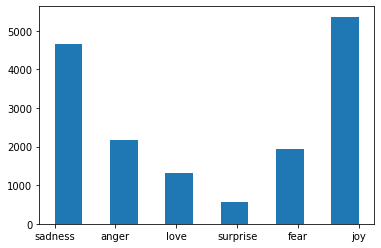

In [ ]:
plt.hist(train_dataset['label'], bins = 11)
plt.show()

In [ ]:
train_list = []
for i in range(0, len(train_dataset['label'])):
  train_list.append([train_dataset['label'][i], train_dataset['text'][i]])

test_list = []
for i in range(0, len(test_dataset['label'])):
  test_list.append([test_dataset['label'][i], test_dataset['text'][i]])

val_list = []
for i in range(0, len(val_dataset['label'])):
  val_list.append([val_dataset['label'][i], val_dataset['text'][i]])

#6 7 minutes


In [ ]:

print(len(train_list))
print(len(test_list))
print(len(val_list))


16000
2000
2000


In [ ]:
#Balancing Dataset

In [ ]:
max_data = 5500

In [ ]:
def cleaner(text):
        text = re.sub(r'http\S+', "", text) #remove links
        text = re.sub("[_:;-@#,.%*+=]"," ", text) #replaces _ : ; - @ # , . % * + =
        text = re.sub(r'([a-z](?=[A-Z])|[A-Z](?=[A-Z][a-z]))', r'\1 ', text) #adds a single space between small and capital letter
        text = re.sub('(\d+(\.\d+)?)', r' \1 ', text) #adds a single space before a number attached to a alphabet
        text = re.sub(r"[\([{\“\”\'\'\"\"})\]]", " ", text) #removes brackets and "" ''
        text = " ".join(text.split()) #removes unnecessary extra spaces
        return emoji.replace_emoji(text, replace='') #removes emoji

In [ ]:
#--------------------------Sad Management
#https://relatedwords.io/sad

query = "(loss OR bad OR pain OR sad OR suffering OR depression OR hurt OR stress OR cry OR sad OR tears OR panic OR tragic OR sorry OR trauma OR unhappy OR disappointment OR crying OR grief OR sorrow OR distressing OR helplessness OR unfortunate OR heartbreaking OR regretful OR upset OR disappointed OR depressed OR unpleasant OR lonely OR scared OR worried OR hopeless OR tired OR stressed OR bored OR disappointing OR uncomfortable OR sick) lang:en until:2022-04-01 since:2015-01-01"
sad_tweets = []
limit = max_data - train_sad
        
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
  if len(sad_tweets) == limit:
    break
  else:    
    sad_tweets.append(cleaner(tweet.content))


random.shuffle(sad_tweets)
print(sad_tweets)

sad_list2 = copy.deepcopy(sad_tweets)
for i in range(0,limit):
  train_list.append(['sadness', sad_list2[i].lower()])

print(len(train_list))

['RB Reich nvygrl 1 Bad Susan! Bad girl', 'csquared 2817 that bad huh', 'I have almost finished one whole weeks worth of work in just today Just gotta have this wokr ethic tomorrow and a lil more after and I can feel completely stress free to grind p for Honeypot &gt I m coming for that intense 0 - 2 &gt', '‘Little lamb died’ Our Yorkshire Farm star Amanda Owen’s ‘sad’ loss as she shares update', 'I feel very tired and vague in the head', 'lovingmykaty crying yes I was like 12 / 13 here I look more like 7 / 8 though hahaha ', 'I M DANCING TO THE SONG As It Was BUT IN A CRYING WAY', 'cromagnus San Bernardino is the worst—looks like Beijing sometimes I don’t miss the So Cal pollution I remember going to the LA County Fair once when I was pretty young and my lungs fucking hurt I was a young healthy kid and didn’t even know what was happening That shit was lethal', 'It’s like at first he’s worried he forgot his belongings but then he realizes he doesn’t really need much when he has freedom

In [ ]:
#--------------------------joy Management
#https://relatedwords.io/joy

query = "(interest OR entertainment OR peace OR freedom OR hope OR spirit OR happy OR relief OR fun OR surprise OR passion OR pride OR pleasure OR happiness OR comfort OR smile OR motivation OR enthusiasm OR delight OR bliss OR satisfaction OR cheer OR excitement OR admiration OR laughter OR gratitude OR thrill OR enjoyment OR warmth OR longing OR goodness OR fulfilment OR joyfully OR joyful OR rejoice OR joyously OR joy OR overjoy) lang:en until:2022-04-01 since:2015-01-01"
joy_tweets = []
limit = max_data - train_joy
        
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
  if len(joy_tweets) == limit:
    break
  else:    
    joy_tweets.append(cleaner(tweet.content))


random.shuffle(joy_tweets)
print(joy_tweets)

joy_list2 = copy.deepcopy(joy_tweets)
for i in range(0,limit):
  train_list.append(['joy', joy_list2[i].lower()])

print(len(train_list))

['jasonschreier They gotta find excuses for their huge ass real estate problem Only people happy to return to the office are CE Os and shitty middle managers Because their ONLY value is theatrics and everyone has seen how utterly useless they are They re certainly hindering profits at ABK ', 'Bonnie Blue TK Hope it heals quick… spring gardening is hard on the hands and wrists', 'it s not my choice that he is my local member but here we are so let s hope the people of Goldstein rise up and turf the arsehole out of f cking office and send the LNP to purgatory as even hell don t deserve that lot', 'hallmark 541 Skippercuse 1 Plz Call Me T katie RN 1 Heart The Jesus Dash Hound 7 It s an honour she is a feckin Saint sure!! Me being Irish I gotta keep in with them you know she s loved and I m so happy she sees how much by us all well done to you too Mrs for gathering us all ', 'Aria Saki Happy Birthday Aria! Have a fun birthday!', 'At Peace! Loving me!', 'bleasdalefamily I hope they all get 

In [ ]:
#--------------------------Surprise Management
#https://www.macmillandictionary.com/thesaurus-category/british/interjections-of-surprise-and-shock

query = "(ooh OR wow OR well OR oh OR lord OR hey OR oh OR aah OR well OR oh OR bingo OR ah OR eish OR goodness OR god OR sake OR jesus OR christ OR surprise OR voilà OR voila OR ! OR Relief OR Triumph OR Enthusiasm) lang:en until:2022-04-01 since:2015-01-01" 
surprise_tweets = []
limit = max_data - train_surprise
        
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
  if len(surprise_tweets) == limit:
    break
  else:    
    surprise_tweets.append(cleaner(tweet.content))


random.shuffle(surprise_tweets)
print(surprise_tweets)

surprise_list2 = copy.deepcopy(surprise_tweets)
for i in range(0,limit):
  train_list.append(['surprise', surprise_list2[i].lower()])

print(len(train_list))

['Luka Zer 0 notcjounin At least three people went wow you are sooooo cool for being different as if that was the only reason I said that But besides that nothing really happened Just a ratio here and there', 'Pop Base now can she delete her career it s for the sake of humanity', 'WOW! Highlight Reel Save Along with 16 Saves in the first period', 'feeling like listening to some oldies well right here you need to come starts s at 8 PM and', 'humanblacklight Be well', 'Ins 0 mnia Vincit I literally texted my brother the other day and was like Hey I know you mentioned liking WWDITS have you seen OFMD And have been spending every moment since trying to get him to watch it', 'abbylibby benshapiro Oh and Lw C if you count that separately from the Blaze', 'xipapa 321 Oh you re the CEO of AI art', 'Thank you God', 'suckafreetee 2 x Oh shit Tee my condolences to you and yours', 'iamcardib Well never see him', 'Bamsthe BWGC stinkythinktank Oh snap!', 'Cosmo Saito Hgk— Oh no Oh nononono Cosmo Thi

In [ ]:
#--------------------------Anger Management
#https://www.thesaurus.com/e/ways-to-say/s/12-shades-of-angry-emotions/#12-shades-of-angry

query = "(Annoyed OR Offended OR Sullen OR Uptight OR Exasperated OR Indignant OR Resentful OR Bitter OR Irate OR Furious OR Outraged) lang:en until:2022-04-01 since:2015-01-01"
anger_tweets = []
limit = limit = max_data - train_anger
        
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
  if len(anger_tweets) == limit:
    break
  else:    
    anger_tweets.append(cleaner(tweet.content))

random.shuffle(anger_tweets)
print(anger_tweets)
print(len(anger_tweets))

anger_list2 = copy.deepcopy(anger_tweets)
for i in range(0,limit):
  train_list.append(['anger', anger_list2[i].lower()])

print(len(train_list))

['Prudence Akciti lizzyemcee taderfxt ashoncrawley I have been entertained by his artistic endeavors though I haven t supported him financially I love Questlove and he crossed the line as well but that was surprising to me and much more disappointing than Perry', 'Honestly speaking Wtf do Ari have to be bitter about Lol', 'The pacing in fast and Furious 7 is kind of slow', 'My favorite thing to say was You stupid mother fuckers know what to do right before a slam and people indeed did know what to do and they weren’t offended ¯\\ ツ /¯', 'Jada Pinkett Smith wasn’t the only one furious at Chris Rock’s Oscars gag I know how traumatic hair loss is | Arwa Mahdawi', 'diijahhhhhh They calling her bitter too &amp I’m like is she not suppose to protect her child… They hate baby mothers fr', 'I got on IG and instantly got annoyed Why is Ari doing the most ', 'Yosohn be hearing his bitter mommy talk shit about Ms Tai Tai now he starting to be a asshole They need to let that child stay in a child’

In [ ]:
#--------------------------Love Management
#https://grammar.yourdictionary.com/word-lists/list-of-romantic-words.html

query = "(adore OR admire OR beguile OR care OR caress OR cherish OR choose OR court OR cuddle OR daydream OR embrace OR entice OR delight OR fantasize OR immortalize OR mesmerize OR overture OR treasure OR value OR woo OR worship OR adorable OR amazing OR angel OR beautiful OR beloved OR better OR you OR darling OR dearest OR enchanting OR friend OR lover OR gorgeous OR handsome OR heavenly OR life OR my OR everything OR sweetheart OR wonderful) lang:en until:2022-04-01 since:2015-01-01"
love_tweets = []
limit = max_data - train_love
        
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
  if len(love_tweets) == limit:
    break
  else:    
    love_tweets.append(cleaner(tweet.content))


random.shuffle(love_tweets)
print(love_tweets)

love_list2 = copy.deepcopy(love_tweets)
for i in range(0,limit):
  train_list.append(['love', love_list2[i].lower()])

print(len(train_list))

['i really can’t tell if you pulled it back or your hair is gone', 'I wonder how many friendships/relationships have been thwarted by my RBF Like how many times has someone passed me and thought That lady looks like she s half a pack of cigarettes and a Walmart trip away from killing someone and I was actually in a good ass mood', 'misesnotmarx 420 I went to a Jordan Peterson event at my university a few years ago Absolutely hilarious reception The lefties ran him off campus', 'Proverbs 17 1 Better is a dry morsel and quietness therewith than an house full of sacrifices with strife', 'Help My Spouse Is A Demon!!!! via Facebook Watch', 'Investing is also method of buying time for the future you You invest not for the sole purpose of buying anything you want but to be free from the system', 'Lord Scuti thank you I will never give up!', 'sunflowerjazmin WHAT DO YOU THINK', 'Say my name say my name ', 'harry styles is such a beautiful man allll around', 'Thank you God my business was selec

In [ ]:
#--------------------------fear Management
#https://relatedwords.io/fear

query = "(terrifying OR shivers OR goose OR bumps OR goosebumps OR scare OR hell OR afraid OR scared OR shout OR cry OR run OR anxiety OR fearfulness OR horror OR panic OR terror OR creeps OR nervousness OR hate OR dread OR phobia OR anger OR angst OR danger OR alarm OR threat OR hatred OR fearful OR stress OR fightorflight OR pain OR frustration OR fearfully OR trauma OR worries OR hysteria OR terrified OR fear OR aggression OR threaten) lang:en until:2022-04-01 since:2015-01-01"
fear_tweets = []
limit = max_data - train_fear
        
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
  if len(fear_tweets) == limit:
    break
  else:    
    fear_tweets.append(cleaner(tweet.content))

random.shuffle(fear_tweets)
print(fear_tweets)

fear_list2 = copy.deepcopy(fear_tweets)
for i in range(0,limit):
  train_list.append(['fear', fear_list2[i].lower()])

print(len(train_list))

['idk if anyone told yall this but ur not quirky or special for acting like u hate H’s every move this isnt 2013 wattpad ur not gonna bump into him at the mall and get his attention by shitting on his work', 'Current stress level constantly thinking about cosmic brownies', 'isaiahahahahh But sometimes it force you to see the other movies to understand what the hell is going on and sometimes is tedious', 'They put me in the house sad as hell with the gf and Stella Artois pull up   htt…', 'incognitoho nasiaaaaax 3 This is EXACTLY MY THOUGHT! Saying he’d shoot her and even that video the other day of him leaving because he thought she was having another baby Nobody deserves to be abused But that baby seems bad as hell No telling what she going through with him', 'hrryacting Jump scare', 'Andy Lofgren My governor is so terrified of this that he is going off the rails with all these fascist laws he is passing', 'i’m literally going to cry and i can’t bc i’m at work', 'Dominick 7 Ajay Kh 12 

In [ ]:
random.shuffle(train_list)
#creating dataframe
train_df = pd.DataFrame(train_list, columns=['label', 'text'])
test_df = pd.DataFrame(test_list, columns=['label', 'text'])
val_df = pd.DataFrame(val_list, columns=['label', 'text'])

In [ ]:
#saving the dataframe
train_df.to_csv('train.csv')
test_df.to_csv('test.csv')
val_df.to_csv('val.csv')

In [ ]:
#loading the dataframe
train = pd.read_csv ('train.csv')
test = pd.read_csv ('test.csv')
val = pd.read_csv ('val.csv')

In [ ]:
print(train.value_counts('label'))

label
anger       5500
fear        5500
joy         5500
love        5500
sadness     5500
surprise    5500
dtype: int64


In [ ]:
train.head()

,Unnamed: 0,label,text
0,0,fear,running like a horse on fire by maple you know...
1,1,fear,the only raisin i like is raisin hell am i rig...
2,2,fear,i think im just being stupid feeling nervous
3,3,sadness,y’all acting like yoshon not bad as hell
4,4,joy,i wasnt the only one feeling very pleased abou...


In [ ]:
def get_tweet(df):
  tweets = df['text'].tolist()
  labels = df['label'].tolist()
  return tweets, labels

In [ ]:
tweets, labels = get_tweet(train)

In [ ]:
tweets[1], labels[1]

('the only raisin i like is raisin hell am i right ladies', 'fear')

In [ ]:
# Tokenization

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')
tokenizer.fit_on_texts(tweets)

In [ ]:
tokenizer.texts_to_sequences([tweets[0]])

[[610, 19, 6, 2571, 27, 1121, 55, 7894, 10, 51, 61, 3318, 8, 212]]

In [ ]:
tweets[0]

'running like a horse on fire by maple you know from seasons of pain'

In [ ]:
# Padding and Truncating Sequences

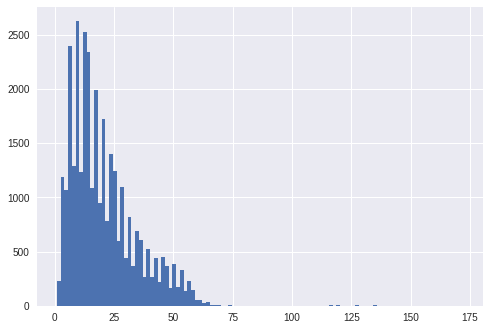

In [ ]:
lengths = [len(t.split(' ')) for t in tweets]
plt.hist(lengths, bins = len(set(lengths)))
plt.show()
#tweet length vs frequency

In [ ]:
maxlen = 60
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
def get_sequences(tokenizer, tweets):
  sequences = tokenizer.texts_to_sequences(tweets)
  padded = pad_sequences(sequences, truncating='post', padding='post', maxlen=maxlen)
  return padded

In [ ]:
padded_train_seq = get_sequences(tokenizer, tweets)

In [ ]:
padded_train_seq[0]

array([ 610,   19,    6, 2571,   27, 1121,   55, 7894,   10,   51,   61,
       3318,    8,  212,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0], dtype=int32)

In [ ]:
# Preparing Labels

In [ ]:
classes = set(labels)
print(classes)

{'love', 'surprise', 'anger', 'fear', 'sadness', 'joy'}


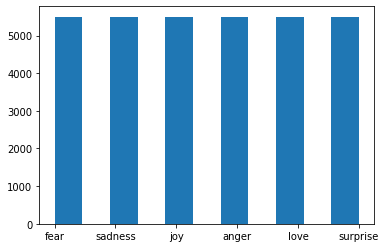

In [ ]:
plt.hist(labels, bins = 11)
plt.show()

In [ ]:
class_to_index = dict((c,i) for i,c in enumerate(classes))
index_to_class = dict((v,k) for k,v in class_to_index.items())

In [ ]:
class_to_index

{'anger': 2, 'fear': 3, 'joy': 5, 'love': 0, 'sadness': 4, 'surprise': 1}

In [ ]:
index_to_class

{0: 'love', 1: 'surprise', 2: 'anger', 3: 'fear', 4: 'sadness', 5: 'joy'}

In [ ]:
names_to_ids = lambda labels:np.array([class_to_index.get(x) for x in labels])

In [ ]:
train_labels = names_to_ids(labels)
print(train_labels[0])

3


In [ ]:
# Creating the model

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Embedding(10000,16,input_length=maxlen),
                                    tf.keras.layers.Dropout(rate=0.6),
                                    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
                                    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
                                    tf.keras.layers.Dropout(rate=0.7),
                                    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 60, 16)            160000    
                                                                 
 dropout (Dropout)           (None, 60, 16)            0         
                                                                 
 bidirectional (Bidirectiona  (None, 60, 40)           5920      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 40)                0         
                                                                 
 dense (Dense)               (None, 6)                 2

In [ ]:
# Training the model

In [ ]:
val_tweets, val_labels = get_tweet(val)
val_sequences = get_sequences(tokenizer, val_tweets)
val_labels = names_to_ids(val_labels)

In [ ]:
val_tweets[0], val_labels[0]

('im feeling quite sad and sorry for myself but ill snap out of it soon', 4)

In [ ]:
h = model.fit(
    padded_train_seq, train_labels,
    validation_data=(val_sequences, val_labels),
    epochs=180,
    callbacks=
    [
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=60)
    ]
)

Epoch 1/180
1032/1032 [==============================] - 27s 16ms/step - loss: 1.5629 - accuracy: 0.3265 - val_loss: 1.3881 - val_accuracy: 0.4040
Epoch 2/180
1032/1032 [==============================] - 15s 15ms/step - loss: 1.2476 - accuracy: 0.4798 - val_loss: 1.1017 - val_accuracy: 0.4490
Epoch 3/180
1032/1032 [==============================] - 15s 15ms/step - loss: 1.0518 - accuracy: 0.5548 - val_loss: 0.9547 - val_accuracy: 0.5140
Epoch 4/180
1032/1032 [==============================] - 15s 15ms/step - loss: 0.9664 - accuracy: 0.5965 - val_loss: 0.9176 - val_accuracy: 0.5405
Epoch 5/180
1032/1032 [==============================] - 15s 15ms/step - loss: 0.9153 - accuracy: 0.6364 - val_loss: 0.9052 - val_accuracy: 0.5825
Epoch 6/180
1032/1032 [==============================] - 15s 15ms/step - loss: 0.8652 - accuracy: 0.6595 - val_loss: 0.8746 - val_accuracy: 0.5370
Epoch 7/180
1032/1032 [==============================] - 15s 15ms/step - loss: 0.8384 - accuracy: 0.6762 - val_loss: 0

In [ ]:
from keras.models import load_model
    
model.save('model.h5')  # creates a HDF5 file 'model.h5'
del model  

In [ ]:
# Testing the model

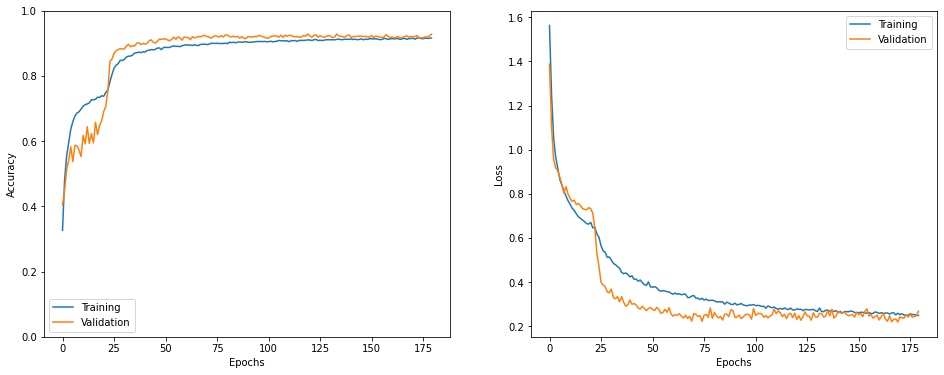

In [ ]:
show_history(h)

In [ ]:
from keras.models import load_model

model = load_model('model.h5')

In [ ]:
test_tweets, test_labels = get_tweet(test)
test_sequences = get_sequences(tokenizer, test_tweets)
test_labels = names_to_ids(test_labels)

In [ ]:
_ = model.evaluate(test_sequences, test_labels)

63/63 [==============================] - 2s 8ms/step - loss: 0.2487 - accuracy: 0.9205


In [ ]:
i = 0
j = 0
k = 0
i = random.randint(0, len(test_labels) - 1)
j = random.randint(0, len(test_labels) - 1)
k = random.randint(0, len(test_labels) - 1)


print('Sentence:', test_tweets[i])
print('True Emotion:', index_to_class[test_labels[i]])

p = model.predict(np.expand_dims(test_sequences[i], axis=0))[0]
pred_class = index_to_class[np.argmax(p).astype('uint8')]
print('Predicted Emotion:', pred_class)
print('\n')
print('Sentence:', test_tweets[j])
print('True Emotion:', index_to_class[test_labels[j]])
p = model.predict(np.expand_dims(test_sequences[j], axis=0))[0]
pred_class = index_to_class[np.argmax(p).astype('uint8')]
print('Predicted Emotion:', pred_class)
print('\n')
print('Sentence:', test_tweets[k])
print('True Emotion:', index_to_class[test_labels[j]])
p = model.predict(np.expand_dims(test_sequences[k], axis=0))[0]
pred_class = index_to_class[np.argmax(p).astype('uint8')]
print('Predicted Emotion:', pred_class)
print('\n')


Sentence: i was studying i always had the feeling that the process was unpleasant but it was absolutely necessary
True Emotion: sadness
Predicted Emotion: sadness


Sentence: i breathe into the feelings in my body resisting my mind s clever attempts to analyse what i m feeling
True Emotion: joy
Predicted Emotion: joy


Sentence: i have ever seen in my life was laceys constant disapprovements of rikkis extreme happiness when she just wasnt feeling quite as carefree as he was
True Emotion: joy
Predicted Emotion: joy




In [ ]:
#implementation

In [ ]:
import datetime

text1 = input("#")
text2 = input("From(dd/mm/yy): ")

date1 = datetime.datetime.strptime(text2, "%d/%m/%y").date()
date2 = date1 + datetime.timedelta(days=30)

query = "(#"+text1+") lang:en until:"+date2.strftime('%Y-%m-%d')+" since:"+date1.strftime('%Y-%m-%d')+" -filter:links -filter:replies"
tweets = []
date = []
emo = []

limit = 1000
        
for value in sntwitter.TwitterSearchScraper(query).get_items():
  if len(tweets) == limit:
    break
  else:    
    date.append(value.date)
    tweets.append(cleaner(value.content))

tweets_tokenized = get_sequences(tokenizer, tweets)

for i in tweets_tokenized:
  p = model.predict(np.expand_dims(i, axis=0))[0]
  emo.append(index_to_class[np.argmax(p).astype('uint8')])


#bmw
From(dd/mm/yy): 20/02/22


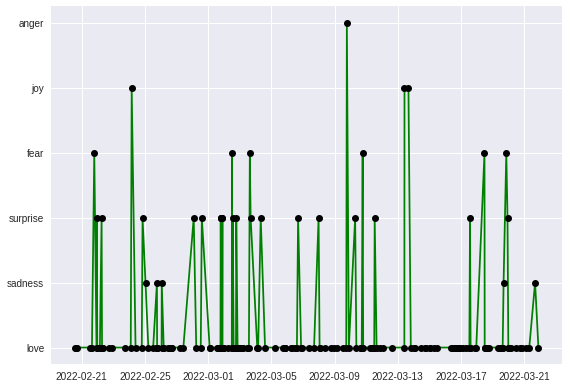

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates

plt.style.use('seaborn')
plt.plot_date(date, emo, linestyle='solid', color='green', markerfacecolor='black')
plt.tight_layout()
#print(date)

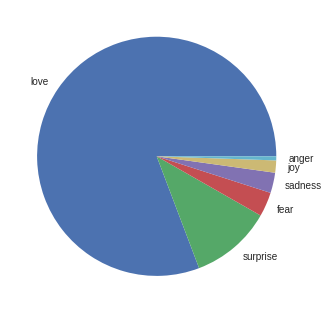

In [ ]:
import matplotlib.pyplot as plt
labels = list(freq.keys())

values = list(freq.values())
plt.pie(values, labels=labels)
plt.show()

In [ ]:
freq = {}
total = 0
for items in emo:
  freq[items] = emo.count(items)
for value in freq.items():
  total = total+value[1]
marklist = sorted(freq.items(), key=lambda x:x[1], reverse=True)
freq = dict(marklist)
for key, value in freq.items():
  print ("% s: % d"%(key, value/total*100), end="")
  print("%")

love:  80%
surprise:  10%
fear:  3%
sadness:  2%
joy:  1%
anger:  0%


In [ ]:
# This project is developed by AKANKSHA PRIYA & SASHWAT JHA. 